In [1]:
#Importing Dependencies

import tensorflow as tf
print(tf.__version__)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\Dell\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


2.0.0


In [2]:
#Reading Data and preprocessing

data = pd.read_csv(r"E:\machine_learning_examples\tf2.0\moore.csv", header=None).values


X = data[:,0].reshape(-1,1)    #Converting 1-D vector to 1*1 array
Y = data[:,1]

print(X.shape)
print(Y.shape)

(162, 1)
(162,)


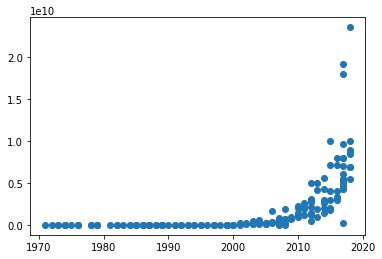

In [4]:
plt.scatter(X,Y)

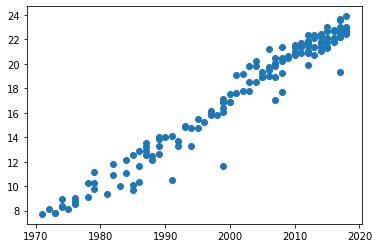

In [5]:
Y = np.log(Y)
plt.scatter(X, Y)

In [6]:
X = X - X.mean()

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
])

In [8]:
model.compile(optimizer=tf.keras.optimizers.SGD(0.001, 0.9), loss='mse')

#learning rate scheduler
def schedule(epoch, lr):
    if epoch >= 50:
        return 0.0001
    return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

#Train the model
r = model.fit(X, Y, epochs=200, callbacks=[scheduler])

Train on 162 samples
Epoch 1/200
162/162 [==============================] - 1s 9ms/sample - loss: 462.2349
Epoch 2/200
162/162 [==============================] - 0s 166us/sample - loss: 641.7109
Epoch 3/200
162/162 [==============================] - 0s 80us/sample - loss: 338.9725
Epoch 4/200
162/162 [==============================] - 0s 74us/sample - loss: 271.8864
Epoch 5/200
162/162 [==============================] - 0s 86us/sample - loss: 273.6470
Epoch 6/200
162/162 [==============================] - 0s 68us/sample - loss: 220.9272
Epoch 7/200
162/162 [==============================] - 0s 80us/sample - loss: 110.0171
Epoch 8/200
162/162 [==============================] - 0s 80us/sample - loss: 64.3584
Epoch 9/200
162/162 [==============================] - 0s 74us/sample - loss: 45.4522
Epoch 10/200
162/162 [==============================] - 0s 86us/sample - loss: 33.0627
Epoch 11/200
162/162 [==============================] - 0s 86us/sample - loss: 24.8862
Epoch 12/200
162/162 [==

162/162 [==============================] - 0s 68us/sample - loss: 0.8828
Epoch 96/200
162/162 [==============================] - 0s 86us/sample - loss: 0.8984
Epoch 97/200
162/162 [==============================] - 0s 86us/sample - loss: 0.9199
Epoch 98/200
162/162 [==============================] - 0s 74us/sample - loss: 0.8780
Epoch 99/200
162/162 [==============================] - 0s 68us/sample - loss: 0.8766
Epoch 100/200
162/162 [==============================] - 0s 74us/sample - loss: 0.9000
Epoch 101/200
162/162 [==============================] - 0s 74us/sample - loss: 0.8988
Epoch 102/200
162/162 [==============================] - 0s 68us/sample - loss: 0.8757
Epoch 103/200
162/162 [==============================] - 0s 62us/sample - loss: 0.8920
Epoch 104/200
162/162 [==============================] - 0s 68us/sample - loss: 0.8880
Epoch 105/200
162/162 [==============================] - 0s 68us/sample - loss: 0.9293
Epoch 106/200
162/162 [==============================] - 0s 8

162/162 [==============================] - 0s 62us/sample - loss: 0.8744
Epoch 190/200
162/162 [==============================] - 0s 74us/sample - loss: 0.8740
Epoch 191/200
162/162 [==============================] - 0s 55us/sample - loss: 0.8729
Epoch 192/200
162/162 [==============================] - 0s 62us/sample - loss: 0.8793
Epoch 193/200
162/162 [==============================] - 0s 68us/sample - loss: 0.8856
Epoch 194/200
162/162 [==============================] - 0s 55us/sample - loss: 0.8742
Epoch 195/200
162/162 [==============================] - 0s 68us/sample - loss: 0.8742
Epoch 196/200
162/162 [==============================] - 0s 74us/sample - loss: 0.8731
Epoch 197/200
162/162 [==============================] - 0s 49us/sample - loss: 0.8843
Epoch 198/200
162/162 [==============================] - 0s 62us/sample - loss: 0.8773
Epoch 199/200
162/162 [==============================] - 0s 68us/sample - loss: 0.8819
Epoch 200/200
162/162 [==============================] - 

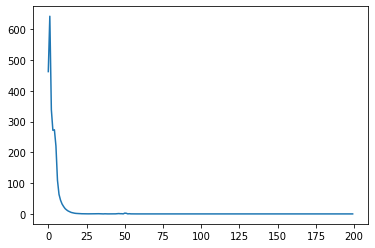

In [9]:
plt.plot(r.history['loss'], label='loss')

In [10]:
print(model.layers)
print(model.layers[0].get_weights())

[array([[0.3399087]], dtype=float32), array([17.755287], dtype=float32)]


In [12]:
#Slope of the line is 

model.layers[0].get_weights()[0][0,0]

0.3399087